<a href="https://colab.research.google.com/github/tbonne/IntroDataScience/blob/main/fullNoteBooks/Intro_RandomForest_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='http://drive.google.com/uc?export=view&id=1Xa0UZixN0DKiYhSnWf6FakY7Kz3xZFI_' width=500>



# <font color='lightblue'>Random forests</font>

Let's take a look at random forests as a way to avoid over/under fitting our model decision tree models. Here we will use this algorithm to predict who will have diabetes. 

Load in the needed libraries

In [29]:
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


### <font color='lightblue'>Load the data</font>

Get the 'wine.csv' from the class's shared data folder and load it into a dataframe.

In [30]:
#get wine to a dataframe
df_diab = pd.read_csv('/content/diabetes.csv')

#take a look
df_diab


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<img src='http://drive.google.com/uc?export=view&id=1WC4tXGCEF-1_2LQ74gIxJAZ-GLXCwBdK' width="100" align = 'left'>  

Q: what kinds of data are we dealing with?

In [31]:
df_diab.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Q: are there any missing values?

In [32]:
df_diab.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### <font color='lightblue'>Descriptive statistics</font> 

Let's take a little time to look at some summary statistics.
 
E.g., how many values of outcome types there are? 

In [33]:
#count how many of each value in a column using value_conunts
df_diab.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

What would be our accuracy if we always predicted the most common value?

In [34]:
500/(500+268)

0.6510416666666666

<img src='http://drive.google.com/uc?export=view&id=1WC4tXGCEF-1_2LQ74gIxJAZ-GLXCwBdK' width="100" align = 'left'>  

Q: Choose one feature (column) and get the mean, min, and max.

In [35]:
print('the mean is = ',df_diab.BloodPressure.mean() ) 
print('the min is = ',df_diab.BloodPressure.min() ) 
print('the max is = ',df_diab.BloodPressure.max() ) 


the mean is =  69.10546875
the min is =  0
the max is =  122


In [36]:
df_diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### <font color='lightblue'>Visualizing the data</font> 

Let's plot the relationships between outcome and some of the health measures.
 
Q: Choose one or more wine measures and generate a plot that shows the relationship between that measure and plant type.

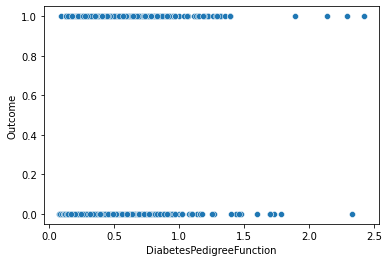

In [37]:
sns.scatterplot(data=df_diab, x='DiabetesPedigreeFunction', y='Outcome')

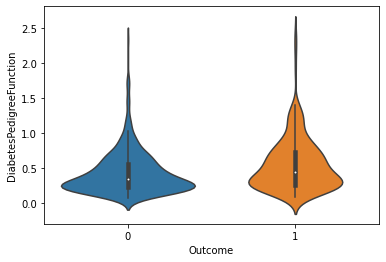

In [38]:
sns.violinplot(data=df_diab, y='DiabetesPedigreeFunction', x='Outcome')

### <font color='lightblue'>Data wrangling</font> 



Training testing split

In [39]:

#split data into predictors (X) and target (y)
X = df_diab.drop('Outcome', axis=1)
y = df_diab['Outcome']

#split these data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


## Model building

Here we will build our first random forest model!

In [40]:
from sklearn.ensemble import RandomForestClassifier

#1. Build the model
forest_classifier = RandomForestClassifier(n_estimators=1000, bootstrap=True, max_features=0.8,max_samples=0.8)

#2. Fit the model to the data
forest_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=0.8,
                       max_leaf_nodes=None, max_samples=0.8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Let's also build a decision tree model for comparison.

In [41]:
from sklearn.tree import DecisionTreeClassifier

#1. Build the model
tree_classifier = DecisionTreeClassifier()

#2. Fit the model to the data
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Make some predictions

In [42]:
#predictions from the forest model
y_forest_pred = forest_classifier.predict(X_test)

In [43]:
#predictions from the tree model
y_tree_pred = tree_classifier.predict(X_test)

Measure classification success

In [44]:
from sklearn.metrics import confusion_matrix
cm_forest = confusion_matrix(y_test, y_forest_pred)
print(cm_forest)

cm_tree = confusion_matrix(y_test, y_tree_pred)
print(cm_forest)


[[90 12]
 [19 33]]
[[90 12]
 [19 33]]


Text(33.0, 0.5, 'True label')

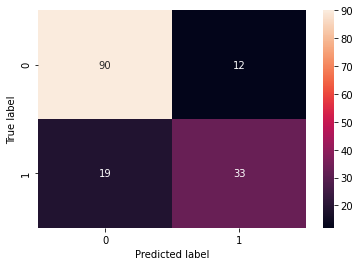

In [45]:
#more visual approach
sns.heatmap(cm_forest, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')

More detailed metrics?

In [46]:
print('Accuracy (forest): {:.2f}'.format(sk.metrics.accuracy_score(y_test, y_forest_pred)))
print('Accuracy (tree): {:.2f}'.format(sk.metrics.accuracy_score(y_test, y_tree_pred)))
print('Null Accuracy: {:.2f}'.format(1-(y_train.sum()/(y_train.count()))))


Accuracy (forest): 0.80
Accuracy (tree): 0.68
Null Accuracy: 0.65


In [47]:
print('Precision (tree): {:.2f}'.format(sk.metrics.precision_score(y_test, y_tree_pred)))
print('Recall (tree): {:.2f}'.format(sk.metrics.recall_score(y_test, y_tree_pred)))

Precision (tree): 0.52
Recall (tree): 0.58


<img src='http://drive.google.com/uc?export=view&id=1qWrKY9TgpgQaBCzZfz1xLTV6iCeSwfmG' width="100" align = 'left'>

### <font color='lightblue'>Hyperparameter tuning</font>

Above we used the default values for how much randomness to include while builing our trees for the random forest. Let's look at how we can use k-fold cross validation to help us choose how much randomness to use when building these trees!

One hyperparameter:

In [48]:
from sklearn.model_selection import cross_val_score

number_of_trees = [50, 100, 150, 200, 250, 300, 350]

for val in number_of_trees:
  scores = cross_val_score(RandomForestClassifier(n_estimators=val), X_train, y_train, cv=5, scoring='accuracy')
  print(scores.mean())

0.749087031853925
0.7523523923763829
0.7686258829801413
0.7555910968945755
0.7474610155937624
0.7507263761162202
0.757243769159003


Many hyperparameters:

In [49]:
from sklearn.model_selection import GridSearchCV

#define what parameters and what values to vary
parameters = {'max_features': [0.5,0.7,0.9,1.0],
              'n_estimators':list(range(50,200,50)),
              'max_samples':[0.5,0.7,0.9,0.99] }

#build the grid search algorithm
grid_search = GridSearchCV(RandomForestClassifier(), parameters, cv=5, scoring='accuracy') #strattified cross validation when traget is binary or multiclass

#Use training data to perform the nfold cross validation
grid_search.fit(X_train, y_train)

#find the best hyperparameters
print(grid_search.best_params_)
grid_search.best_score_

{'max_features': 0.9, 'max_samples': 0.5, 'n_estimators': 150}


0.7670265227242437

<img src='http://drive.google.com/uc?export=view&id=1WC4tXGCEF-1_2LQ74gIxJAZ-GLXCwBdK' width="100" align = 'left'>  

We can see that this quickly becomes time consuming to run. There are many algorithms out there to help tune your models. They generally break down into exhaustive grid searches, vs random searches. But this is an active feild that is growing all the time. 

Now that we've tuned our random forest model let's see if we can beat the default model that we fit! 

In [50]:
#1. build an optimized model
forest_classifier_opt = RandomForestClassifier(n_estimators=150,max_samples=0.5, max_features=1)

#2. Fit the model to the data
forest_classifier_opt.fit(X_train, y_train)

#3. make predictions
y_forest_pred_opt = forest_classifier_opt.predict(X_test)

#Measure accuracy
print('Accuracy: {:.2f}'.format(sk.metrics.accuracy_score(y_test, y_forest_pred_opt)))
print('Precision : {:.2f}'.format(sk.metrics.precision_score(y_test, y_forest_pred_opt)))
print('Recall : {:.2f}'.format(sk.metrics.recall_score(y_test, y_forest_pred_opt)))

Accuracy: 0.79
Precision : 0.76
Recall : 0.56


Text(33.0, 0.5, 'True label')

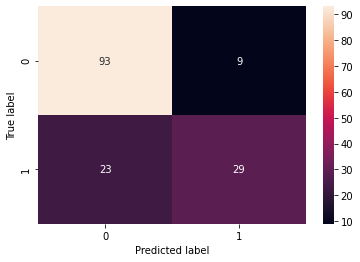

In [51]:
#calculate a confusion matrix
cm_forest_opt = confusion_matrix(y_test, y_forest_pred_opt)

#Plot the confusion matrix
sns.heatmap(cm_forest_opt, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')

Did your optimized model beat the default one?

### <font color='lightblue'>Bonus</font>

In [52]:
#Try adding other hyperparameters, how much better can you make the model by tuning?
#e.g., min_samples_split (how many points in a node are required to allow a split)
#e.g., max_depth (max depth of each tree)

<img src='http://drive.google.com/uc?export=view&id=1qWrKY9TgpgQaBCzZfz1xLTV6iCeSwfmG' width="100" align = 'left'>

### <font color='lightblue'>Model interpretation</font>

Random forests are collections of many decision trees. This makes it a little more difficult to interpret how the predictions are being made, as there can be 1000s of individual trees.
> Let's look at how to use feature importance to evaluate what is being used by the model to make predictions.


In [53]:
from sklearn.inspection import permutation_importance

#use permutation importance
perm_result = permutation_importance(forest_classifier_opt, X=X_test, y=y_test, scoring='accuracy', n_repeats=30)

#place values into a dataframe
forest_importances = pd.DataFrame({'variable':X_test.columns,'impo':perm_result.importances_mean.round(4), "sd":perm_result.importances_std.round(4)})

#sort the dataframe
forest_importances.sort_values(by='impo', ascending=False)

,variable,impo,sd
1,Glucose,0.0991,0.0243
7,Age,0.0251,0.0166
5,BMI,0.0216,0.0163
4,Insulin,0.0095,0.0138
3,SkinThickness,0.0026,0.0122
2,BloodPressure,-0.0024,0.0116
0,Pregnancies,-0.0123,0.0157
6,DiabetesPedigreeFunction,-0.0206,0.0126


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

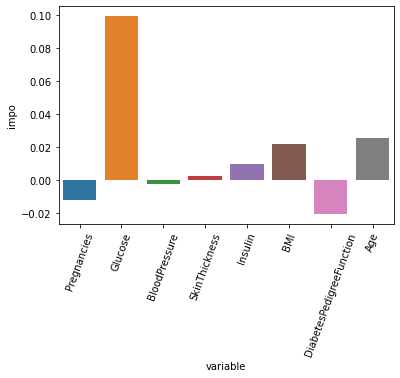

In [54]:
#plot the importance
sns.barplot(data=forest_importances, x='variable',y='impo')
plt.xticks(rotation=70)

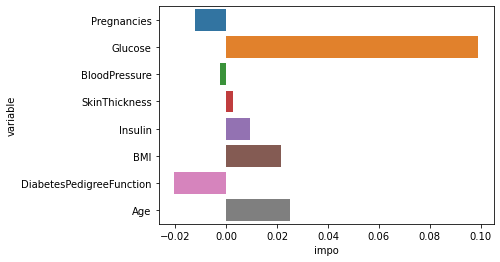

In [55]:
#plot the importance (switch axis to display labels better?)
sns.barplot(data=forest_importances, y='variable',x='impo')


#### Asking your model questions?

Sometimes it can be very helpful to create a dataset that represents a question you have, and then use your model to make predictions to answer that question. For instance, what if someone had mean values for all measures? 

In [71]:
#1. Create a dataframe
df_question = pd.DataFrame({'Pregnancies':X_train.Pregnancies.mean(),
                            'Glucose':X_train.Glucose.mean(),
                            'BloodPressure':X_train.BloodPressure.mean(),
                            'SkinThickness':X_train.SkinThickness.mean(),
                            'Insulin':X_train.Insulin.mean(),
                            'BMI':X_train.BMI.mean(),
                            'DiabetesPedigreeFunction':X_train.DiabetesPedigreeFunction.mean(),
                            'Age':X_train.Age.mean()},
                             index=[0])
                            

#2. Use the model to make predictions
question_pred =  forest_classifier_opt.predict(df_question)

#3. Take a look at the answer
question_pred

array([0])

Now we can make our question a little more interesting by allowing one variable to vary. Let's see how the predictions change as we vary glucose of the average person.

In [79]:
#1. Create a dataframe
df_question = pd.DataFrame({'Pregnancies':X_train.Pregnancies.mean(),
                            'Glucose':list(range(0,200,10)),
                            'BloodPressure':X_train.BloodPressure.mean(),
                            'SkinThickness':X_train.SkinThickness.mean(),
                            'Insulin':X_train.Insulin.mean(),
                            'BMI':X_train.BMI.mean(),
                            'DiabetesPedigreeFunction':X_train.DiabetesPedigreeFunction.mean(),
                            'Age':X_train.Age.mean()})
                            

#2. Use the model to make predictions
question_pred =  forest_classifier_opt.predict(df_question)

#3. Take a look at the answer
question_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

Let's plot the answer

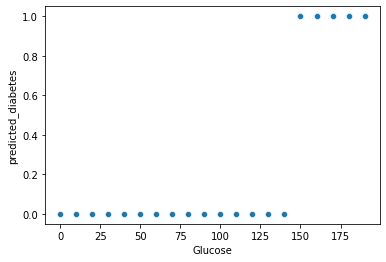

In [80]:
#add a column to the df_question
df_question['predicted_diabetes'] = question_pred

#plot the predictions
sns.scatterplot(data=df_question, x='Glucose',y='predicted_diabetes')

### <font color='lightblue'>Model Application</font>

Let's apply what we learnt about random forests to other datasets. 

In [56]:
#load dataset!